In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns


## _Data Preprocessing:_


### Load the dataset into a suitable data structure

In [2]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\DS_Assignments\Assignment_11-Recomondation_sys\Recommendation System\anime.csv')
data.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [3]:
data.shape

(12294, 7)

In [4]:
data_copy = data.copy()


### Explore the dataset to understand its structure and attributes.

In [5]:
data.shape

(12294, 7)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [7]:
data.describe()

anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06

### Handle missing values, if any.

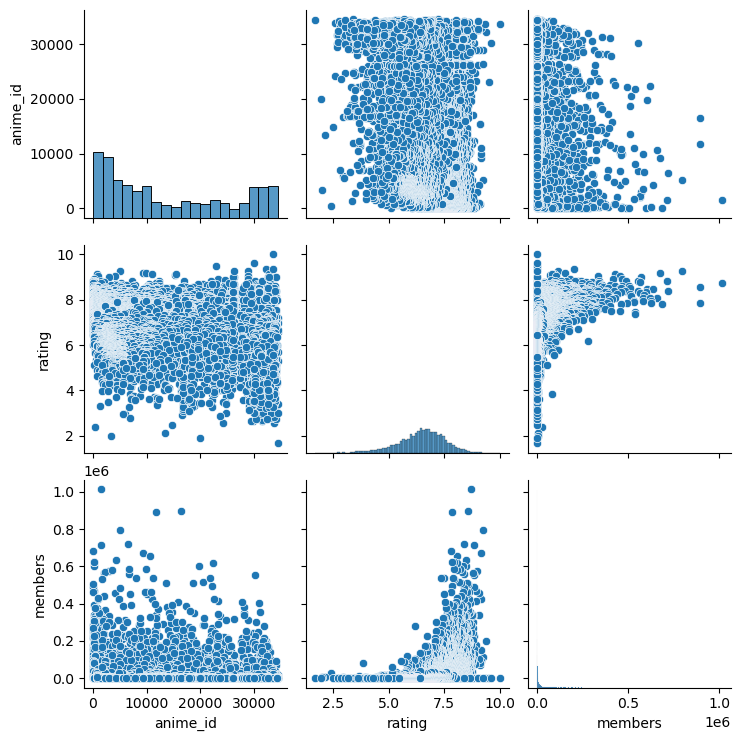

In [8]:
sns.pairplot(data)

In [9]:
data_copy.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
# Decide on a strategy to handle missing values
data_copy = data_copy.dropna().reset_index(drop=True)  # Drop rows with missing values, alternatively you can use imputation methods

In [11]:
data.head()

anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266

In [12]:
print(len(data['name'].unique()))
data_copy['name'].value_counts() # unique movies count

12292


Shi Wan Ge Leng Xiaohua                                                                            2
Saru Kani Gassen                                                                                   2
CCW: Crazy Clay Wrestling                                                                          1
Crayon Angel                                                                                       1
Koumon-teki Juuku Ketsujiru Juke                                                                   1
                                                                                                  ..
Bakusou Kyoudai Let&#039;s &amp; Go!! WGP Bousou Mini Yonku Daitsuiseki                            1
Beet the Vandel Buster Excellion                                                                   1
Black Jack ONA                                                                                     1
Crayon Shin-chan Manatsu no Yoru ni Ora Sanjou! Arashi wo Yobu Den-O vs. Shin-O 60-bu Speci

## _Feature Extraction:_

### Convert categorical features into numerical representations if necessary

In [13]:
# Convert genres to numerical format using one-hot encoding
data_copy['genre'] = data_copy['genre'].str.split(', ')
genres_encoded = data_copy['genre'].str.join('|').str.get_dummies()


### Normalize numerical features

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_copy['rating'] = scaler.fit_transform(data_copy[['rating']])

# Combine the features
anime_features = pd.concat([data_copy[['rating']], genres_encoded], axis=1)
anime_features = anime_features.reset_index(drop=True)

## _Recommendation System:_

### Design a function to recommend anime based on cosine similarity.

In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
# Define the recommendation function
def recommend_anime(anime_name, anime_data, anime_features, top_n=10):
    if anime_name not in anime_data['name'].values:
        raise ValueError(f"Anime name '{anime_name}' not found in the dataset")
    
    # Find the index of the anime
    idx = anime_data[anime_data['name'] == anime_name].index[0]
    
    # Compute the cosine similarity matrix
    cosine_sim = cosine_similarity(anime_features)
    
    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top_n most similar animes
    sim_scores = sim_scores[1:top_n+1]
    
    # Get the anime indices and ensure they are within bounds
    anime_indices = [i[0] for i in sim_scores if i[0] < len(anime_data)]
    
    # Return the top_n most similar animes
    return anime_data.iloc[anime_indices]


### Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [17]:
def recommend_anime_with_threshold(anime_title, anime_data, anime_features, threshold=0.5):
    idx = anime_data[anime_data['name'] == anime_title].index[0]
    cosine_sim = cosine_similarity(anime_features)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = [(i, score) for i, score in sim_scores if score >= threshold and i != idx]
    anime_indices = [i for i, score in sim_scores]
    return anime_data.iloc[anime_indices]

# Example usage
recommend_anime_with_threshold('Naruto', data_copy, anime_features, threshold=0.8)


anime_id                                               name  \
615       1735                                 Naruto: Shippuuden   
1103     32365  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
486      28755                           Boruto: Naruto the Movie   
1343     10075                                        Naruto x UT   
1472      8246        Naruto: Shippuuden Movie 4 - The Lost Tower   
1573      6325  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
2458     19511               Naruto Shippuuden: Sunny Side Battle   
2996     10659  Naruto Soyokazeden Movie: Naruto to Mashin to ...   
175       1604                             Katekyo Hitman Reborn!   
7617     23933                            Kyutai Panic Adventure!   
7819      1009                      Battle Spirits: Ryuuko no Ken   
206        813                                      Dragon Ball Z   
515      22777                             Dragon Ball Kai (2014)   
588       6033                                    Dragon Ball Kai   
1209     14527                                Medaka Box Abnormal   
1409     25389              Dragon Ball Z Movie 15: Fukkatsu no F   
1930     30694                                  Dragon Ball Super   
2615     11761                                         Medaka Box   
3037       174                                       Tenjou Tenge   
3202     22695             Dragon Ball Z: Summer Vacation Special   
4273      6714               Dragon Ball Z: Atsumare! Gokuu World   
4312       987  Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...   
5997       904  Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...   
178      31964                              Boku no Hero Academia   
260       1559                    Shijou Saikyou no Deshi Kenichi   
510      11813                Shijou Saikyou no Deshi Kenichi OVA   
582        269                                             Bleach   
719      16870                         The Last: Naruto the Movie   
784      13667         Naruto: Shippuuden Movie 6 - Road to Ninja   
946       8247                         Bleach Movie 4: Jigoku-hen   
1068      5493                        Ranma ½: Akumu! Shunmin Kou   
1131      4835  Bleach Movie 3: Fade to Black - Kimi no Na wo ...   
1289     16287                            One Piece: Romance Dawn   
1428      5252                      One Piece: Romance Dawn Story   
1543      2903                               Sakigake!! Otokojuku   
1796       238                                     Rekka no Honoo   
2128     24029           Shijou Saikyou no Deshi Kenichi Specials   
2259     33929     Boku no Hero Academia: Jump Festa 2016 Special   
2416     10686  Naruto: Honoo no Chuunin Shiken! Naruto vs. Ko...   
2585      1738                               Muteki Kanban Musume   
2912      2335                              Kenyuu Densetsu Yaiba   
2932      6941         Toriko: Jump Super Anime Tour 2009 Special   
2933       961                                     Virtua Fighter   
2951       968                      Kakutou Bijin Wulong: Rebirth   
3920      4031                         Sakigake!! Otokojuku Movie   
3925     11787              Toriko: Barbarian Ivy wo Hokaku Seyo!   
3928      6964                      Yuu☆Yuu☆Hakusho Picture Drama   
3982       594  Naruto: Takigakure no Shitou - Ore ga Eiyuu Da...   
4010      3853  Crayon Shin-chan Manatsu no Yoru ni Ora Sanjou...   
4574       979                  Street Fighter Zero The Animation   
4699      4427                                 Tatakae!! Ramenman   
6140      7427                    Getsumen To Heiki Mina Specials   
6404     16345                             Ninku: Knife no Bohyou   
6966      1183                                       Variable Geo   
1931     12231                    Dragon Ball: Episode of Bardock   
2980       903  Dragon Ball Z Movie 10: Kiken na Futari! Super...   
3407     22699  Dragon Ball Z: Zenbu Misemasu Toshi Wasure Dra...   
7849

## _Evaluation:_


### Split the dataset into training and testing sets.

In [18]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_copy, test_size=0.2, random_state=42)




### Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.

In [19]:
# Define the evaluation function
def evaluate_recommendations(recommend_func, test_data, anime_data, anime_features, top_n=10):
    y_true = []
    y_pred = []
    
    for anime_name in test_data['name']:
        try:
            recommended_anime = recommend_func(anime_name, anime_data, anime_features, top_n=top_n)
            true_anime = test_data[test_data['name'] == anime_name]['name'].values
            y_true.extend([1 if anime in true_anime else 0 for anime in recommended_anime['name']])
            y_pred.extend([1] * len(recommended_anime))
        except ValueError:
            # If the anime name is not found in the dataset, skip the evaluation for this name
            continue
    
    precision = precision_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    f1 = f1_score(y_true, y_pred, average='micro')
    
    return precision, recall, f1




In [20]:
# Evaluate the recommendation system
from sklearn.metrics import precision_score, recall_score, f1_score


In [21]:
precision, recall, f1 = evaluate_recommendations(recommend_anime, test_data, data, anime_features, top_n=10)
print(f'Precision: {precision}, Recall: {recall}, F1-score: {f1}')


IndexError: index 12057 is out of bounds for axis 0 with size 12017